In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
class RunLogRegr():
    def __init__(self, X_train: np.ndarray, X_test: np.ndarray, y_train: pd.DataFrame, y_test: pd.DataFrame) -> None:
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def build_logregr(self) -> None:
        self.lr = LogisticRegression(max_iter=200, class_weight='balanced',
                                     solver='liblinear', penalty='l1')
        self.lr.fit(self.X_train, self.y_train['class'])
    
    def make_prediction(self) -> None:
        '''
        METHOD: make_prediction = now make a prediction on the test data with the optimal random forest model
        '''
        self.y_pred = self.lr.predict(self.X_test)
    
    def calc_scores(self) -> None:
        '''
        METHOD: calc_scores = calculate the accuracy, precision, recall, and F1-score
        '''
        self.accuracy = accuracy_score(self.y_test['class'], self.y_pred)
        self.precision = precision_score(self.y_test['class'], self.y_pred)
        self.recall = recall_score(self.y_test['class'], self.y_pred)
        self.f1 = 2*self.precision*self.recall/(self.precision + self.recall)
        
        print("Accuracy =", self.accuracy)
        print("Precision =", self.precision)
        print("Recall =", self.recall)
        print("F1 =", self.f1, '\n')
    
    def print_confusion_matrix(self) -> None:
        '''
        METHOD: print_confusion_matrix = construct the confusion matrix on the test prediction
        '''
        cm = confusion_matrix(self.y_test['class'], self.y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    
    def run(self) -> None:
        '''
        METHOD: run = run all the methods in order
        '''
        self.build_logregr()
        self.make_prediction()
        self.calc_scores()
        self.print_confusion_matrix()

In [3]:
def control_metrics(y_test: pd.DataFrame) -> [float, float, float, float]:
    '''
    FUNCTION: control_metrics = calculate the metrics assuming we predict only 1's, this acts as a control
          IN: y_test = the dataframe from the input data
    '''
    num_HC = len([val for val in y_test['class'] if val == 0])
    num_PD = len([val for val in y_test['class'] if val == 1])

    # assume predict only 1's, these values should be beaten by the random forest model's average metrics
    control_accuracy = (num_PD + 0)/(num_PD + num_HC + 0 + 0)  # (TP + TN)/(TP + FP + TN + FN)
    control_precision = num_PD/(num_PD + num_HC)  # TP/(TP + FP)
    control_recall = num_PD/(num_PD + 0)  # TP/(TP + FN)
    control_f1 = 2*control_precision*control_recall/(control_precision + control_recall)

    print("Control Accuracy =", control_accuracy)
    print("Control Precision =", control_precision)
    print("Control Recall =", control_recall)
    print("Control F1 =", control_f1)
    
    return control_accuracy, control_precision, control_recall, control_f1

In [6]:
front_dir = '../data/split/kfold'

def load_and_run(Kfolds: int) -> None:
    control_accuracy = 0
    control_precision = 0
    control_recall = 0
    control_f1 = 0

    pred_accuracy = 0
    pred_precision = 0
    pred_recall = 0
    pred_f1 = 0
    
    for kk in range(Kfolds):
        X_train = np.loadtxt(front_dir + f'/X_train-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
        X_test = np.loadtxt(front_dir + f'/X_test-{str(kk)}_kfold{str(Kfolds)}.csv', delimiter=',')
        y_train = pd.read_csv(front_dir + f'/y_train-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)
        y_test = pd.read_csv(front_dir + f'/y_test-{str(kk)}_kfold{str(Kfolds)}.csv', index_col=0)

    #     print('---- X_train ----')
    #     print(X_train, '\n')
    #     print('---- X_test ----')
    #     print(X_test, '\n')
    #     print('---- y_train ----')
    #     display(y_train)
    #     print('---- y_test ----')
    #     display(y_test)
        
        print(f"- - FOLD {kk} - -\n")
        controls = control_metrics(y_test)
        control_accuracy += controls[0]
        control_precision += controls[1]
        control_recall += controls[2]
        control_f1 += controls[3]
        print('')
        rlr = RunLogRegr(X_train, X_test, y_train, y_test)
        rlr.run()
        pred_accuracy += rlr.accuracy
        pred_precision += rlr.precision
        pred_recall += rlr.recall
        pred_f1 += rlr.f1
    
    print("-------- Averaged metrics accross the folds --------")
    print("Control Accuracy =", control_accuracy/Kfolds)
    print("Control Precision =", control_precision/Kfolds)
    print("Control Recall =", control_recall/Kfolds)
    print("Control F1 =", control_f1/Kfolds)
    print('')
    print("Predicted Accuracy =", pred_accuracy/Kfolds)
    print("Predicted Precision =", pred_precision/Kfolds)
    print("Predicted Recall =", pred_recall/Kfolds)
    print("Predicted F1 =", pred_f1/Kfolds)

- - FOLD 0 - -

Control Accuracy = 0.743421052631579
Control Precision = 0.743421052631579
Control Recall = 1.0
Control F1 = 0.8528301886792453

Accuracy = 0.8289473684210527
Precision = 0.9065420560747663
Recall = 0.8584070796460177
F1 = 0.8818181818181818 

- - FOLD 1 - -

Control Accuracy = 0.7483443708609272
Control Precision = 0.7483443708609272
Control Recall = 1.0
Control F1 = 0.8560606060606061

Accuracy = 0.8278145695364238
Precision = 0.9484536082474226
Recall = 0.8141592920353983
F1 = 0.8761904761904761 

- - FOLD 2 - -

Control Accuracy = 0.7483443708609272
Control Precision = 0.7483443708609272
Control Recall = 1.0
Control F1 = 0.8560606060606061

Accuracy = 0.7615894039735099
Precision = 0.8598130841121495
Recall = 0.8141592920353983
F1 = 0.8363636363636363 

- - FOLD 3 - -

Control Accuracy = 0.7483443708609272
Control Precision = 0.7483443708609272
Control Recall = 1.0
Control F1 = 0.8560606060606061

Accuracy = 0.8211920529801324
Precision = 0.8909090909090909
Recall =

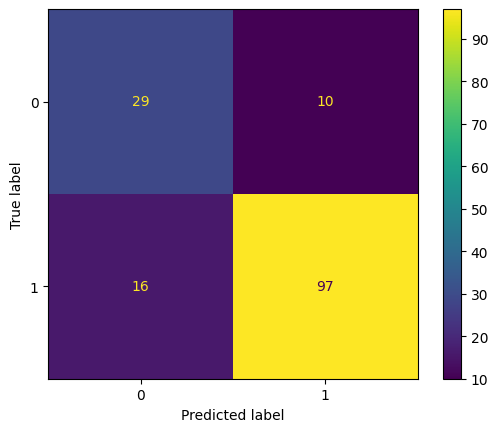

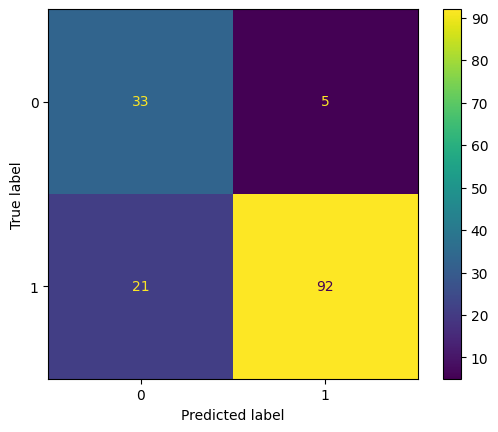

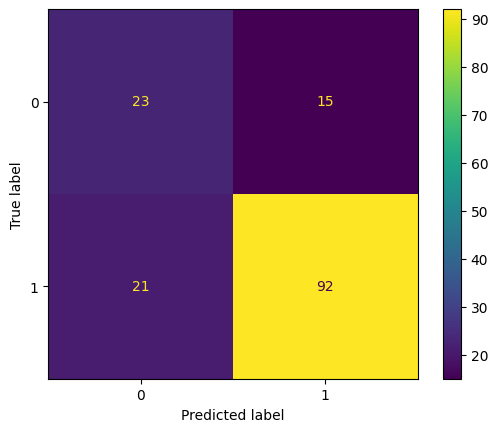

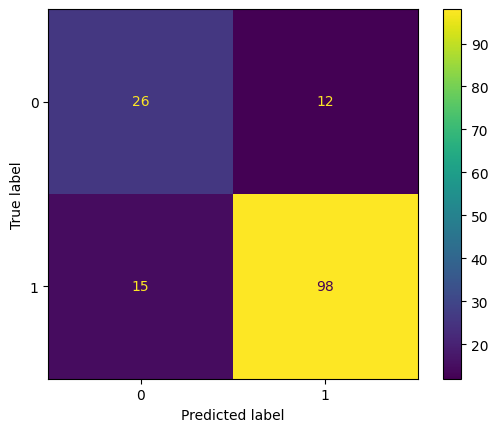

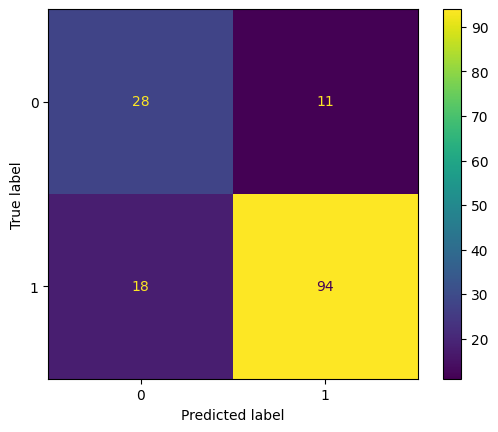

In [17]:
# saga with elasticnet will not converge still
# l2 norm performs worse than l1 norm, meaning feature selection is an issue

load_and_run(5)

In [ ]:
# F- I-- N---